# STAT 201 Project Proposal: Violent Crime Incidents in three Vancouver Neighbourhoods

### Group 37: Elias Khan, Weihao (Beren) Sun, Elaine Zhou, Nika Martinussen

## Introduction

Understanding how crime incidences vary by geographic region is an ongoing area of study by researchers. This report looks at the incidence of violent crime activity within different communities of Vancouver, a populous city in British Columbia, Canada.

An examination of violent crimes in Vancouver in 1996, found that the highest rates of violent crimes were concentrated in the Downtown Eastside and surrounding neighbourhoods, with violent crime rates decreasing as one moved further away from this epicenter (Andreson, 2017). Further, between 2001 and 2008 in Vancouver, geographic hotspots for violent trauma incidents were identified to be the Downtown and Downtown Eastside neighbourhoods (Walker et. al., 2014).

In this report, we are seeking to answer the question: between Point Grey, Kitsilano, and the Central Business District, how does geographic location affect violent crime incidents?

To answer this question, we will use the Vancouver Crime Dataset released by Vancouver Police Department (VPD) as the sample. The dataset describes the type of crime, along with the location and time that the crime occurred, across ten variables.

We will be calculating two quantities of interest to answer this question: the median yearly proportion of violent crime in each neighbourhood between the years of 2003 - 2021, and the mean yearly count of violent crime in each neighbourhood between the years of 2003 - 2021.

## Data Analysis

### Proportion of Violent Crimes in Each Neighbourhood

The first parameter that we are going to calculate is the yearly proportion of violent crimes across three Vancouver neighbourhoods, West Point Grey, Kitsilano, and the Central Business District.

Since the Vancouver Crime data set is constantly changing, the website allows users to customize what data they want to take from the larger data base.

This brings up an issue of not being able to reproduce our data without putting in the exact same data that we have used. To deal with this issue we have put our data set on GitHub where individuals who question our methods and want to reproduce our results may do so.

Here's the link to find the data set: https://github.com/sasiburi/STAT201-Group37

We must first load in the libraries that we need and the data set.

In [2]:
library(tidyverse)
library(infer)

# Load and read data
crime_all_years <- read_csv("https://raw.githubusercontent.com/sasiburi/STAT201-Group37/main/crimedata_csv_AllYears.csv") %>%
                   filter(!is.na(NEIGHBOURHOOD))

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Rows: 267697 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Then we must categorize all of the crimes into either violent or non violent.

In [3]:
# Filter and process data
violent_crime_years <- crime_all_years %>%
                       mutate(Violent = ifelse((TYPE != "Offence Against a Person" & TYPE != "Homicide"), FALSE, TRUE)) %>%
                       select(Violent, YEAR, NEIGHBOURHOOD) %>%
                       filter(YEAR != 2022)


Now we can calculate the proportion of crimes which are violent for each year in the given neighborhoods.

In [4]:
# Calculate proportion of violent crimes for each neighbourhood for each year
crime_proportions <- violent_crime_years %>%
                     group_by(YEAR, NEIGHBOURHOOD) %>%
                     summarize(Violent_Crime_Proportion = sum(Violent == TRUE)/n())
head(crime_proportions)

`summarise()` has grouped output by 'YEAR'. You can override using the `.groups` argument.



YEAR,NEIGHBOURHOOD,Violent_Crime_Proportion
<dbl>,<chr>,<dbl>
2003,Central Business District,0.06144181
2003,Kitsilano,0.03090756
2003,West Point Grey,0.03273810
2004,Central Business District,0.07037280
2004,Kitsilano,0.03518350
2004,West Point Grey,0.03448276


We then create visualization of sampling distributions for median proportion of violent crimes in each of these neighborhoods.

In [5]:
# Create plots of sampling distributions
Point_Grey_Prop <- crime_proportions %>%
                   filter(NEIGHBOURHOOD == "West Point Grey") %>%
                   ggplot(aes(x = Violent_Crime_Proportion)) +
                   geom_histogram(binwidth = 0.005, colour = "white") +
                   xlab("Proportion of Reported Violent Crimes") +
                   ggtitle("Sampling Distribution of the Proportion of Reported Violent Crimes in West Point Grey") +
                   theme(text = element_text(size=15))

Kitsilano_Prop <- crime_proportions %>%
                  filter(NEIGHBOURHOOD == "Kitsilano") %>%
                  ggplot(aes(x = Violent_Crime_Proportion)) +
                  geom_histogram(binwidth = 0.0025, colour = "white") +
                  xlab("Proportion of Reported Violent Crimes") +
                  ggtitle("Sampling Distribution of the Proportion of Reported Violent Crimes in Kitsilano") +
                  theme(text = element_text(size=15))

CBD_Prop <- crime_proportions %>%
            filter(NEIGHBOURHOOD == "Central Business District") %>%
            ggplot(aes(x = Violent_Crime_Proportion)) +
            geom_histogram(binwidth = 0.005, colour = "white") +
            xlab("Proportion of Reported Violent Crimes") +
            ggtitle("Sampling Distribution of the Proportion of Reported Violent Crimes in the Central Business District") +
            theme(text = element_text(size=15))

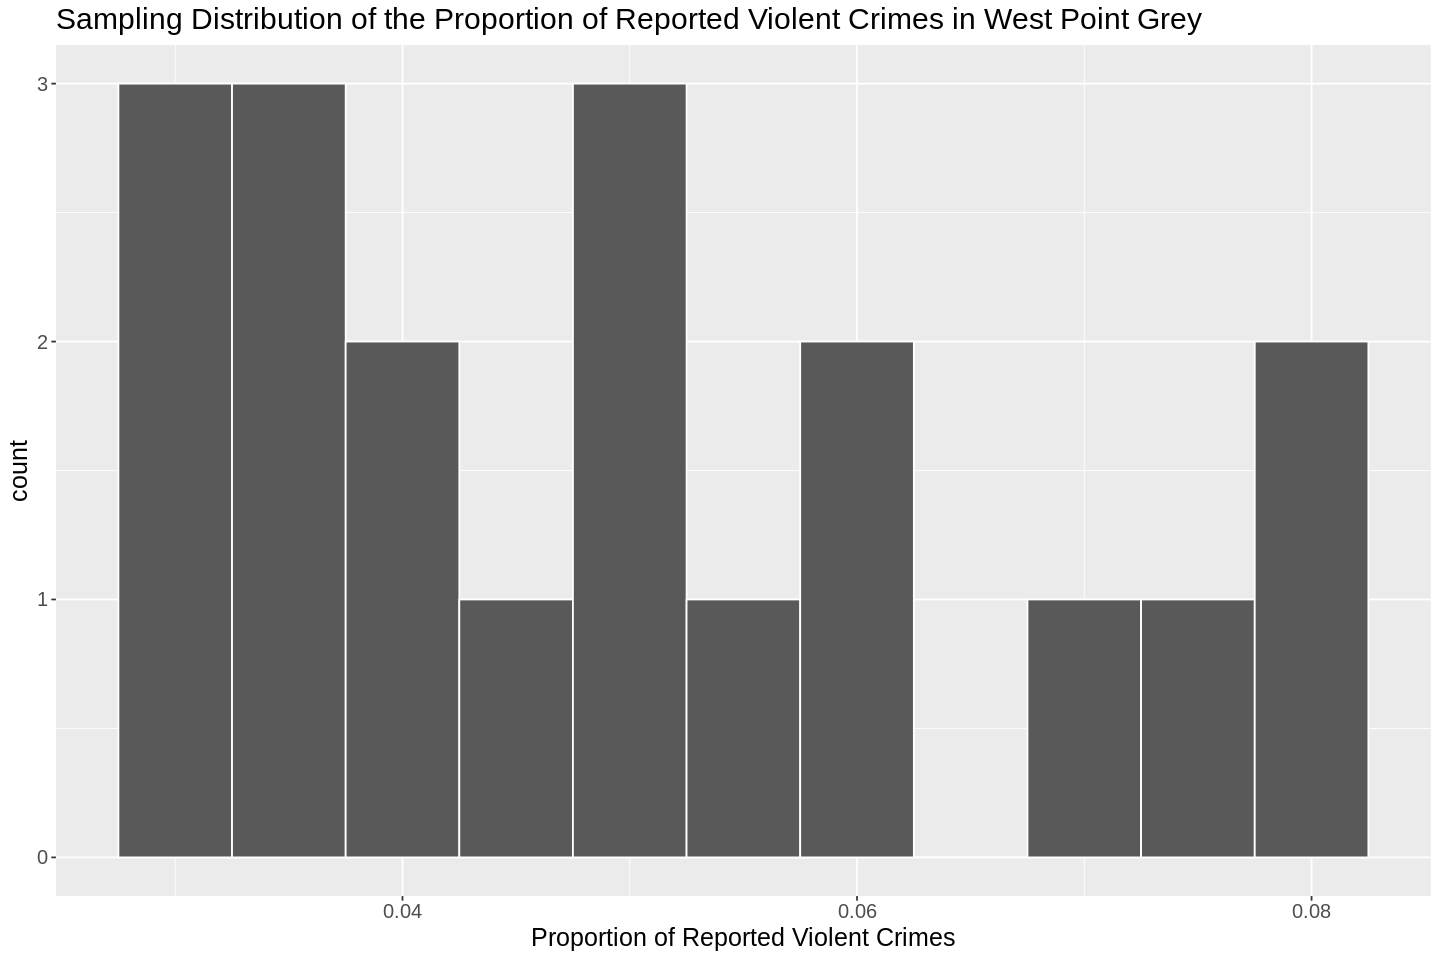

In [6]:
options(repr.plot.width = 12, repr.plot.height = 8)
Point_Grey_Prop

*Figure 1: Sampling Distribution of the Proportion of Reported Violent Crimes in West Point Grey*

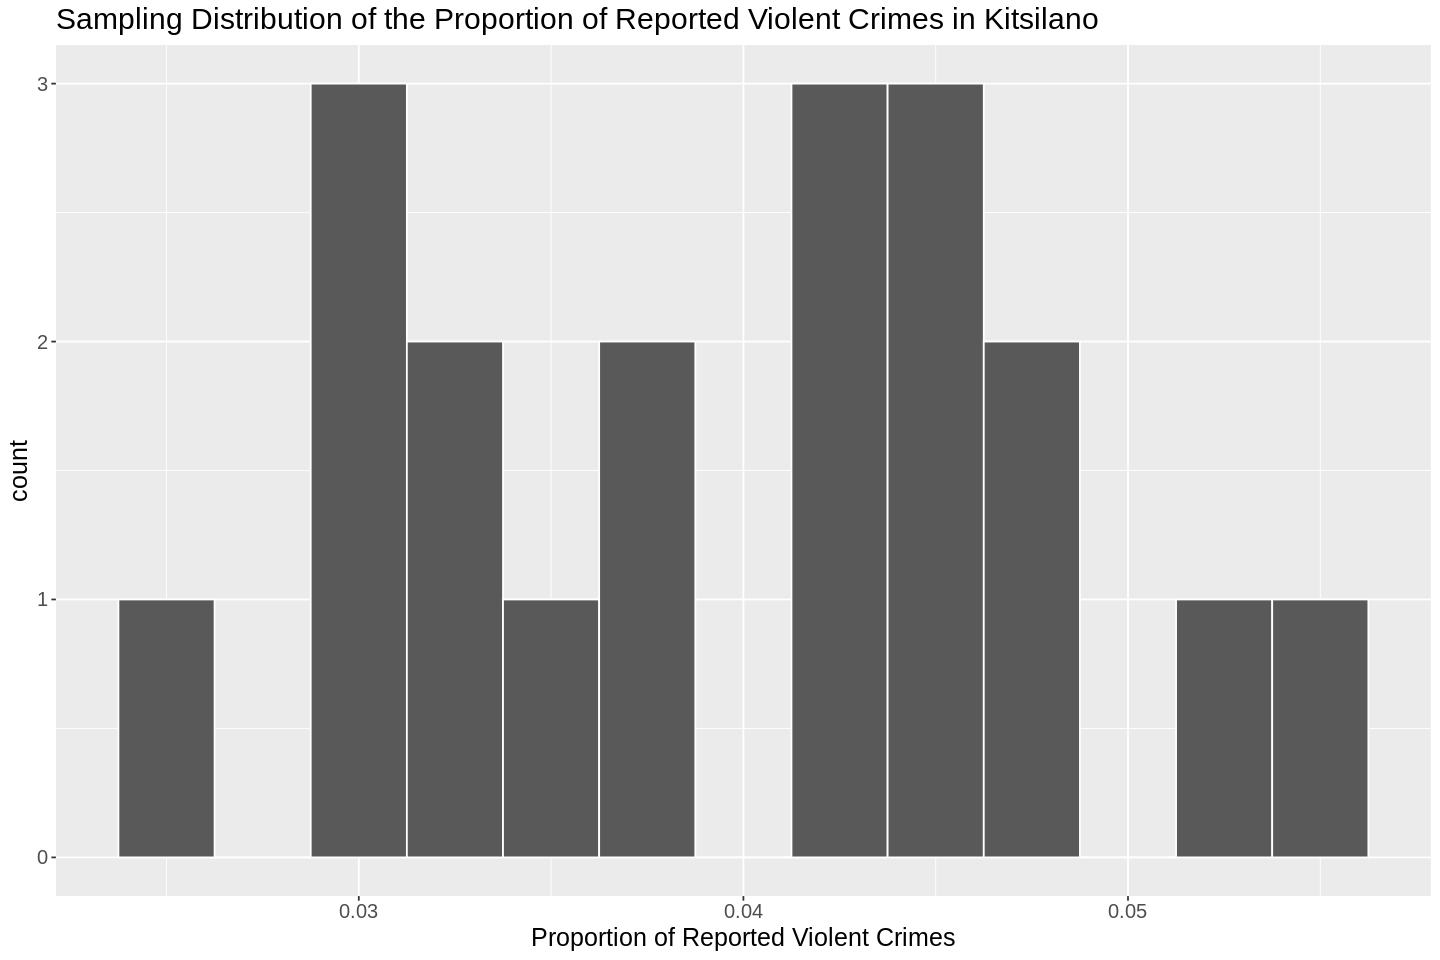

In [7]:
options(repr.plot.width = 12, repr.plot.height = 8)
Kitsilano_Prop

*Figure 2: Sampling Distribution of the Proportion of Reported Violent Crimes in Kitsilano*

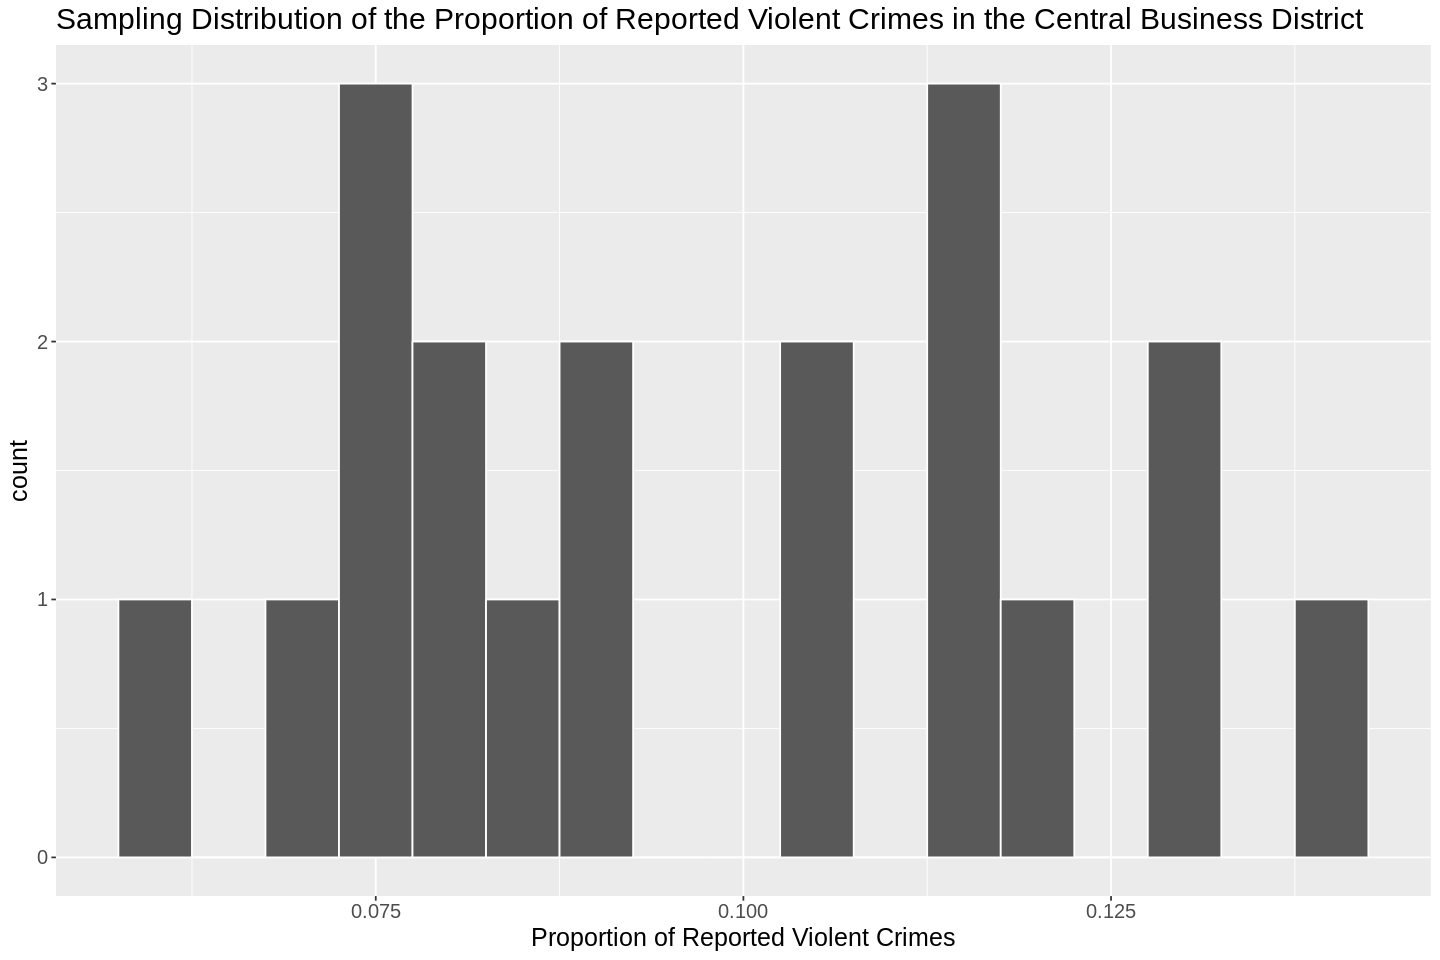

In [8]:
options(repr.plot.width = 12, repr.plot.height = 8)
CBD_Prop

*Figure 3: Sampling Distribution of the Proportion of Reported Violent Crimes in the Central Business District*

The following plot helps to directly compare the median proportion of violent crimes in different neighbourhoods.

In [9]:
# Calculate median proportion of violent crime for each neighbourhood
median_violent_crime_proportions <- crime_proportions %>%
                                    group_by(NEIGHBOURHOOD) %>%
                                    summarize(Median_Proportion = median(Violent_Crime_Proportion))

# Create a visualization
Crime_median_proportion_plot<- median_violent_crime_proportions %>%
                               ggplot(aes(x = reorder(NEIGHBOURHOOD, -Median_Proportion), y = Median_Proportion)) +
                               geom_bar(stat = 'identity') +
                               xlab("Neighourhood") +
                               ylab("Median Proportion of Violent Crimes per Year from 2003 - 2021") +
                               ggtitle("Comparison of the median proportion of violent crimes per year in Vancouver neighbourhoods between 2003 and 2021") +
                               theme(text = element_text(size=15)) +
                               coord_flip()

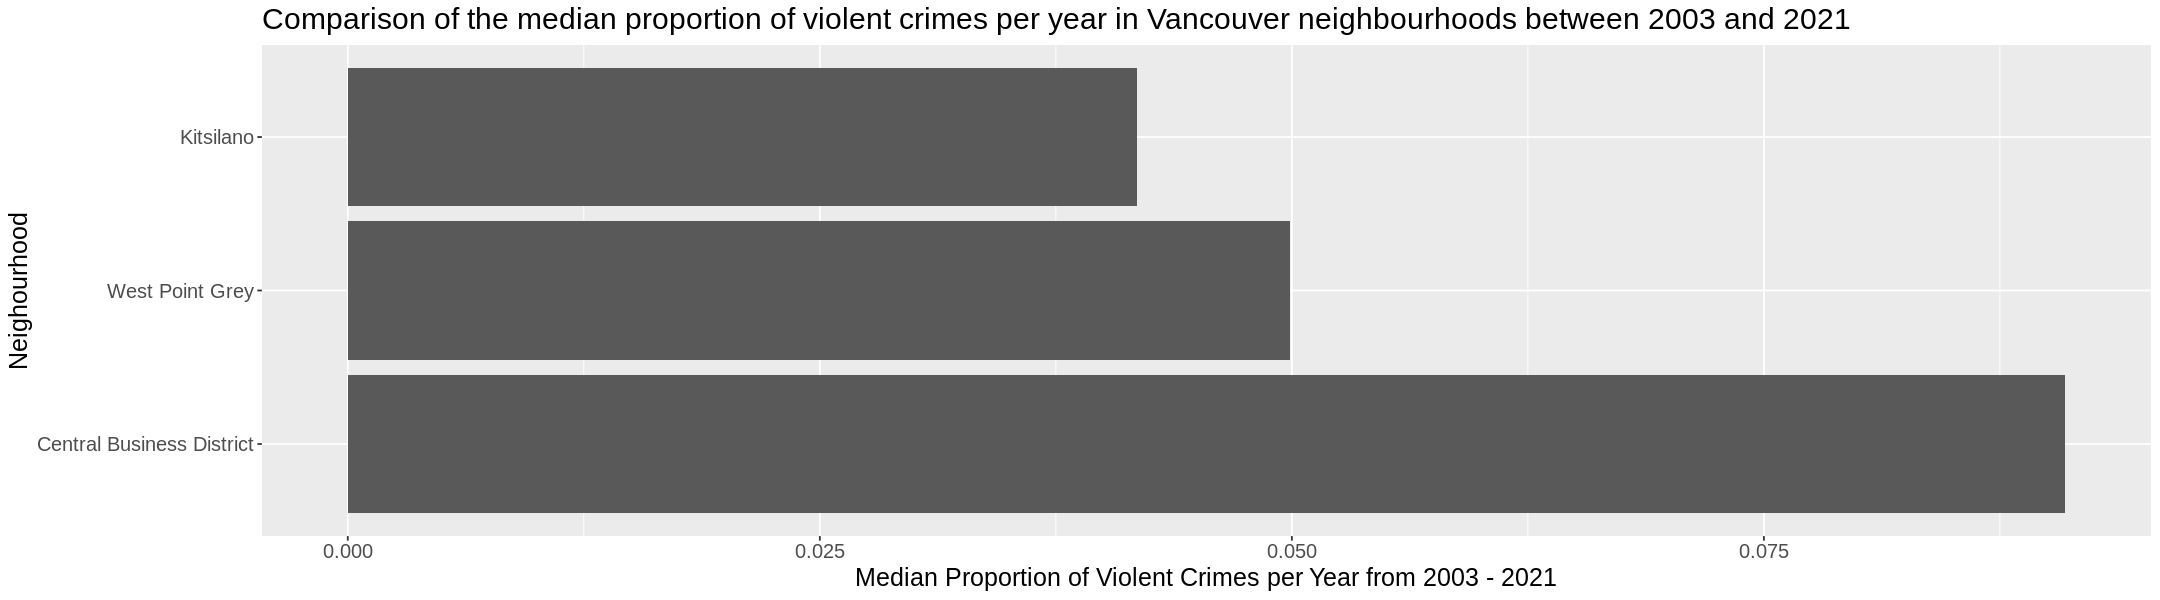

In [10]:
options(repr.plot.width = 18, repr.plot.height = 5)
Crime_median_proportion_plot

*Figure 4: Comparison of the median proportion of violent crimes per year in Vancouver neighbourhoods between 2003 and 2021*

Here is the median proportion of violent crimes in Point Grey, Kitsilano, and the Central Business District.

In [11]:
median_violent_crime_proportions

NEIGHBOURHOOD,Median_Proportion
<chr>,<dbl>
Central Business District,0.09094776
Kitsilano,0.04181390
West Point Grey,0.04988662


*Table 1: Median violent crime proportions per year in Point Grey, Kitsilano, and the Central Business District between 2003 and 2021*

### Yearly Mean of Violent Crimes in Each Neighbourhood 

The second parameter that we are going to calculate is the mean yearly amount of violent crimes across three Vancouver neighbourhoods, West Point Grey, Kitsilano, and the Central Business District.

In [12]:
# Sum amount of violent crimes for each neighbourhood for each year
violent_crime_sum <- violent_crime_years %>%
                     group_by(YEAR, NEIGHBOURHOOD) %>%
                     summarize(Violent_Crime_Incidents = sum(Violent == TRUE))

# Calculate mean of violent crimes per year in each neighbourhood
violent_crime_mean <- violent_crime_sum %>%
                      group_by(NEIGHBOURHOOD) %>%
                      summarize(Mean = mean(Violent_Crime_Incidents))

`summarise()` has grouped output by 'YEAR'. You can override using the `.groups` argument.



Similarly, we produce sampling distributions of mean proportion of violent crimes in Point Grey, Kitsilano, and the Central Business District.

In [13]:
# Create plots of sampling distributions

Point_Grey <- violent_crime_sum %>%
              filter(NEIGHBOURHOOD == "West Point Grey") %>%
              ggplot(aes(x = Violent_Crime_Incidents)) +
              geom_histogram(binwidth = 5, colour = "white") +
              xlab("Number Yearly of Reported Violent Crimes") +
              ggtitle("Sampling Distribution of Yearly Reported Violent Crimes in West Point Grey") + 
              theme(text = element_text(size=15))

Kitsilano <- violent_crime_sum %>%
             filter(NEIGHBOURHOOD == "Kitsilano") %>%
             ggplot(aes(x = Violent_Crime_Incidents)) +
             geom_histogram(binwidth = 5, colour = "white") +
             xlab("Number Yearly of Reported Violent Crimes") +
             ggtitle("Sampling Distribution of Yearly Reported Violent Crimes in Kitsilano") + 
             theme(text = element_text(size=15))

CBD <- violent_crime_sum %>%
       filter(NEIGHBOURHOOD == "Central Business District") %>%
       ggplot(aes(x = Violent_Crime_Incidents)) +
       geom_histogram(binwidth = 40, colour = "white") +
       xlab("Number Yearly of Reported Violent Crimes") +
       ggtitle("Sampling Distribution of Yearly Reported Violent Crimes in the Central Business District") + 
       theme(text = element_text(size=15))

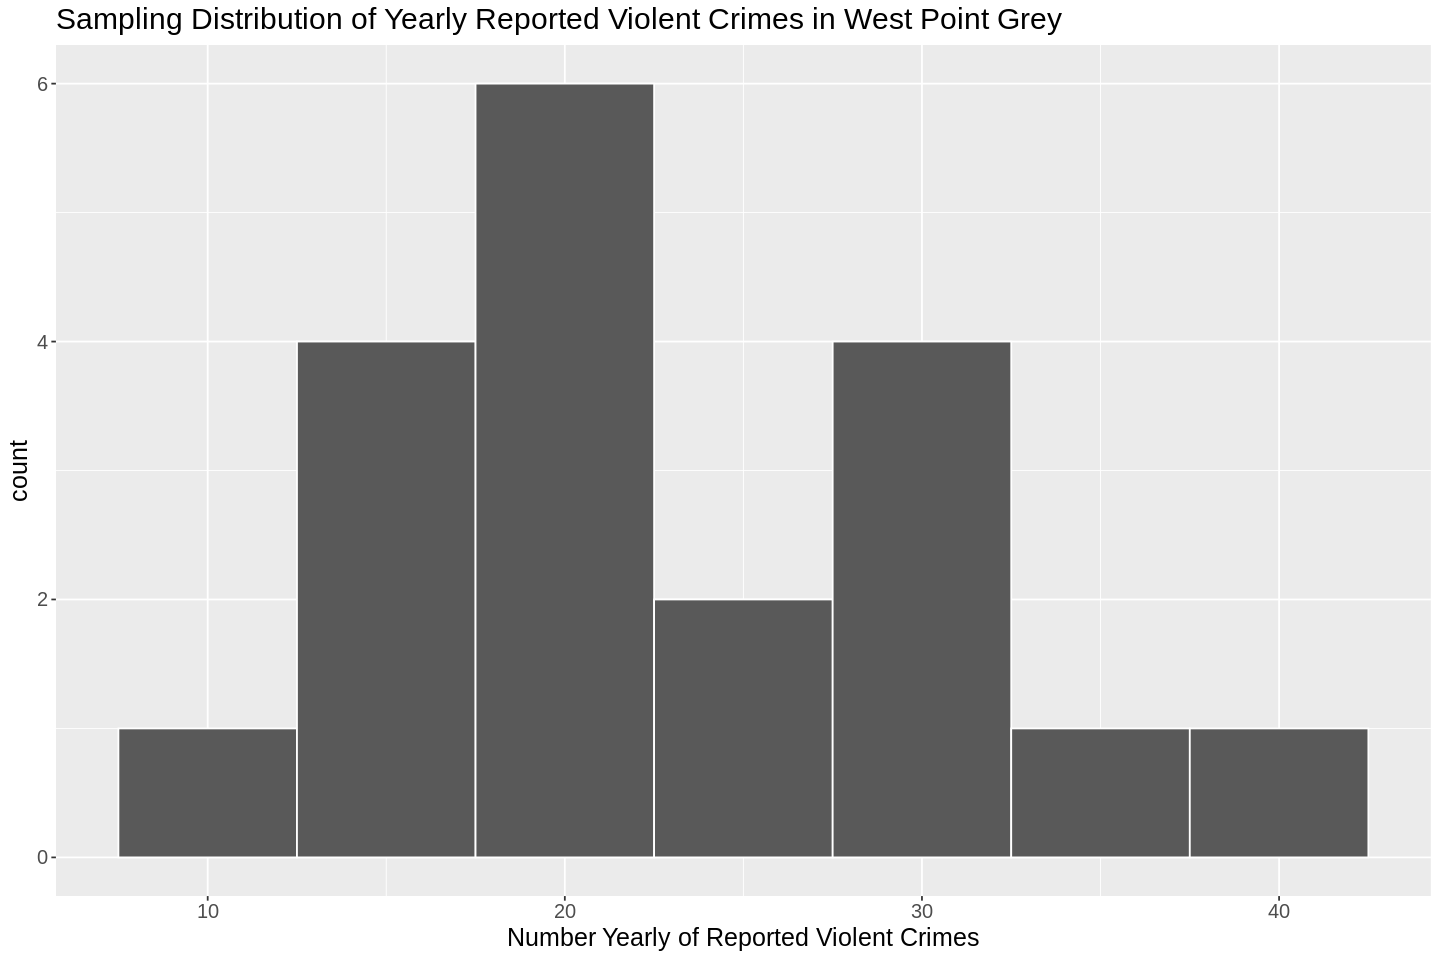

In [14]:
options(repr.plot.width = 12, repr.plot.height = 8)
Point_Grey

*Figure 5: Sampling Distribution of Yearly Reported Violent Crimes in Point Grey*

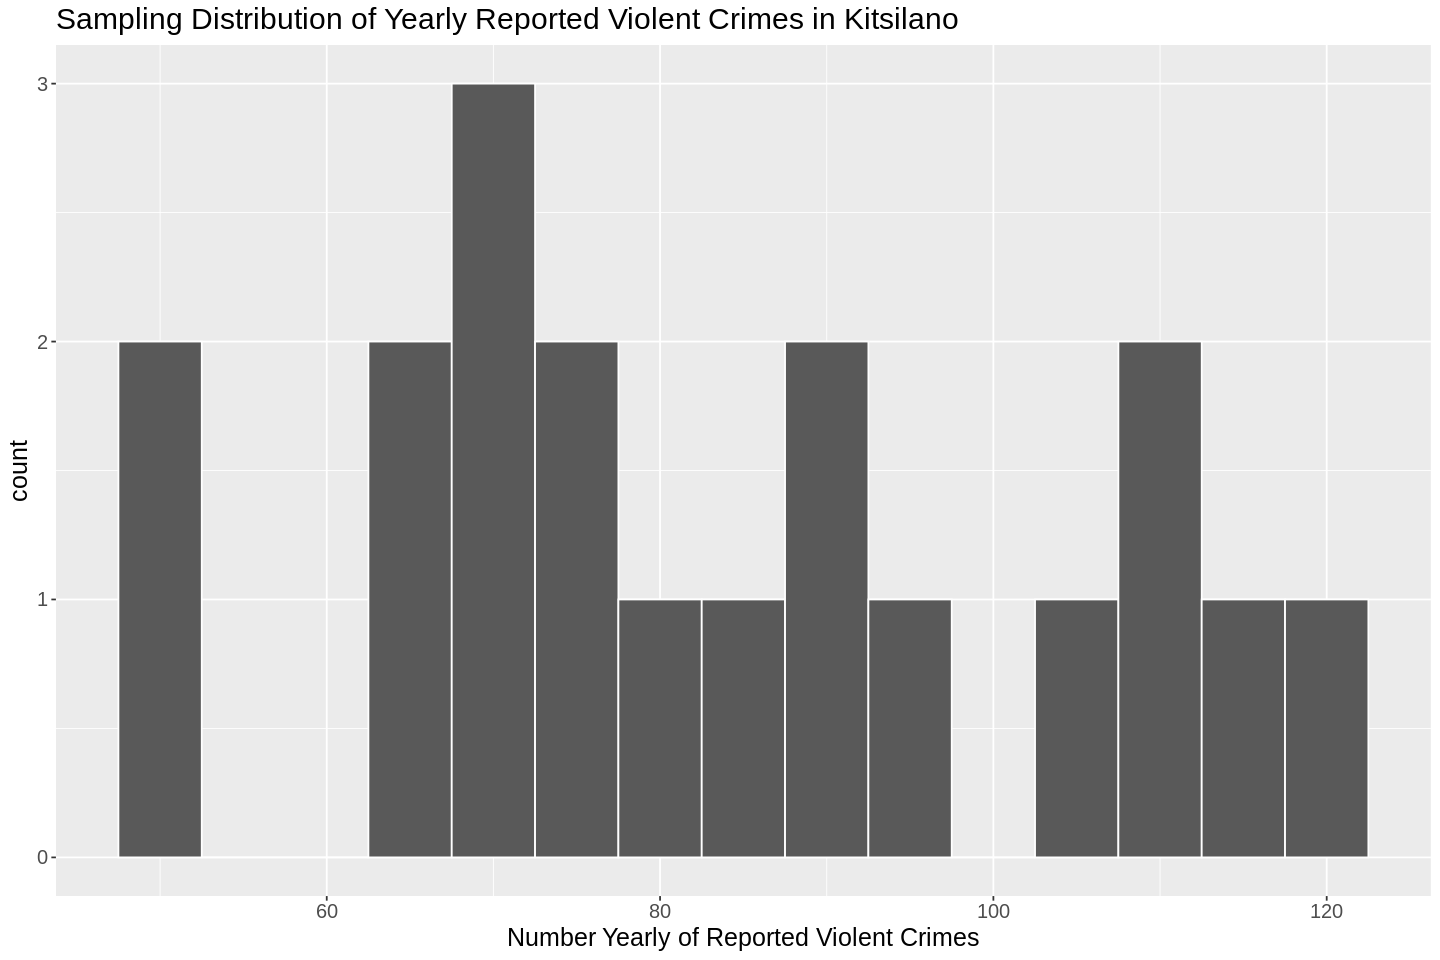

In [15]:
options(repr.plot.width = 12, repr.plot.height = 8)
Kitsilano

*Figure 6: Sampling Distribution of Yearly Reported Violent Crimes in Kitsilano*

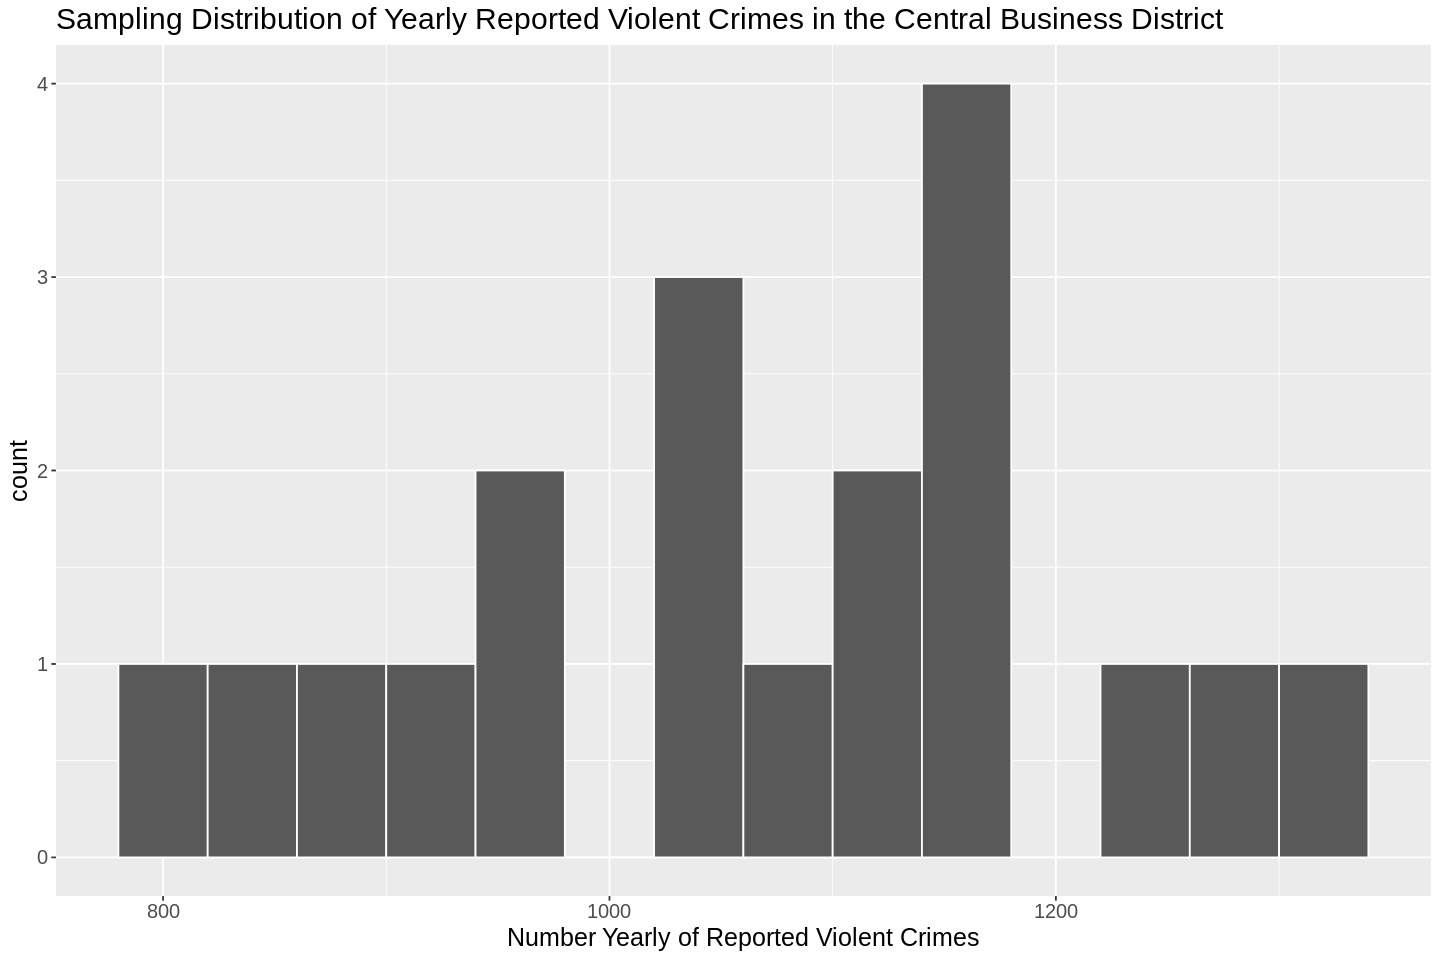

In [16]:
options(repr.plot.width = 12, repr.plot.height = 8)
CBD

*Figure 7: Sampling Distribution of Yearly Reported Violent Crimes in the Central Business District*

As what we did before, we create the plot to directly demonstrate the mean proportion of violent crimes in Point Grey, Kitsilano, and the Central Business District.

In [17]:
# Create a plot to demonstrate results
Crime_mean_plot<- violent_crime_mean %>%
                  ggplot(aes(x = reorder(NEIGHBOURHOOD, -Mean), y = Mean)) +
                  geom_bar(stat = 'identity') +
                  xlab("Neighourhood") +
                  ylab("Mean amount of violent crimes over 2003 - 2021") +
                  ggtitle("Comparison of the mean amount of violent crimes per year in Vancouver neighbourhoods between 2003 and 2021") +
                  theme(text = element_text(size=15)) +
                  coord_flip()

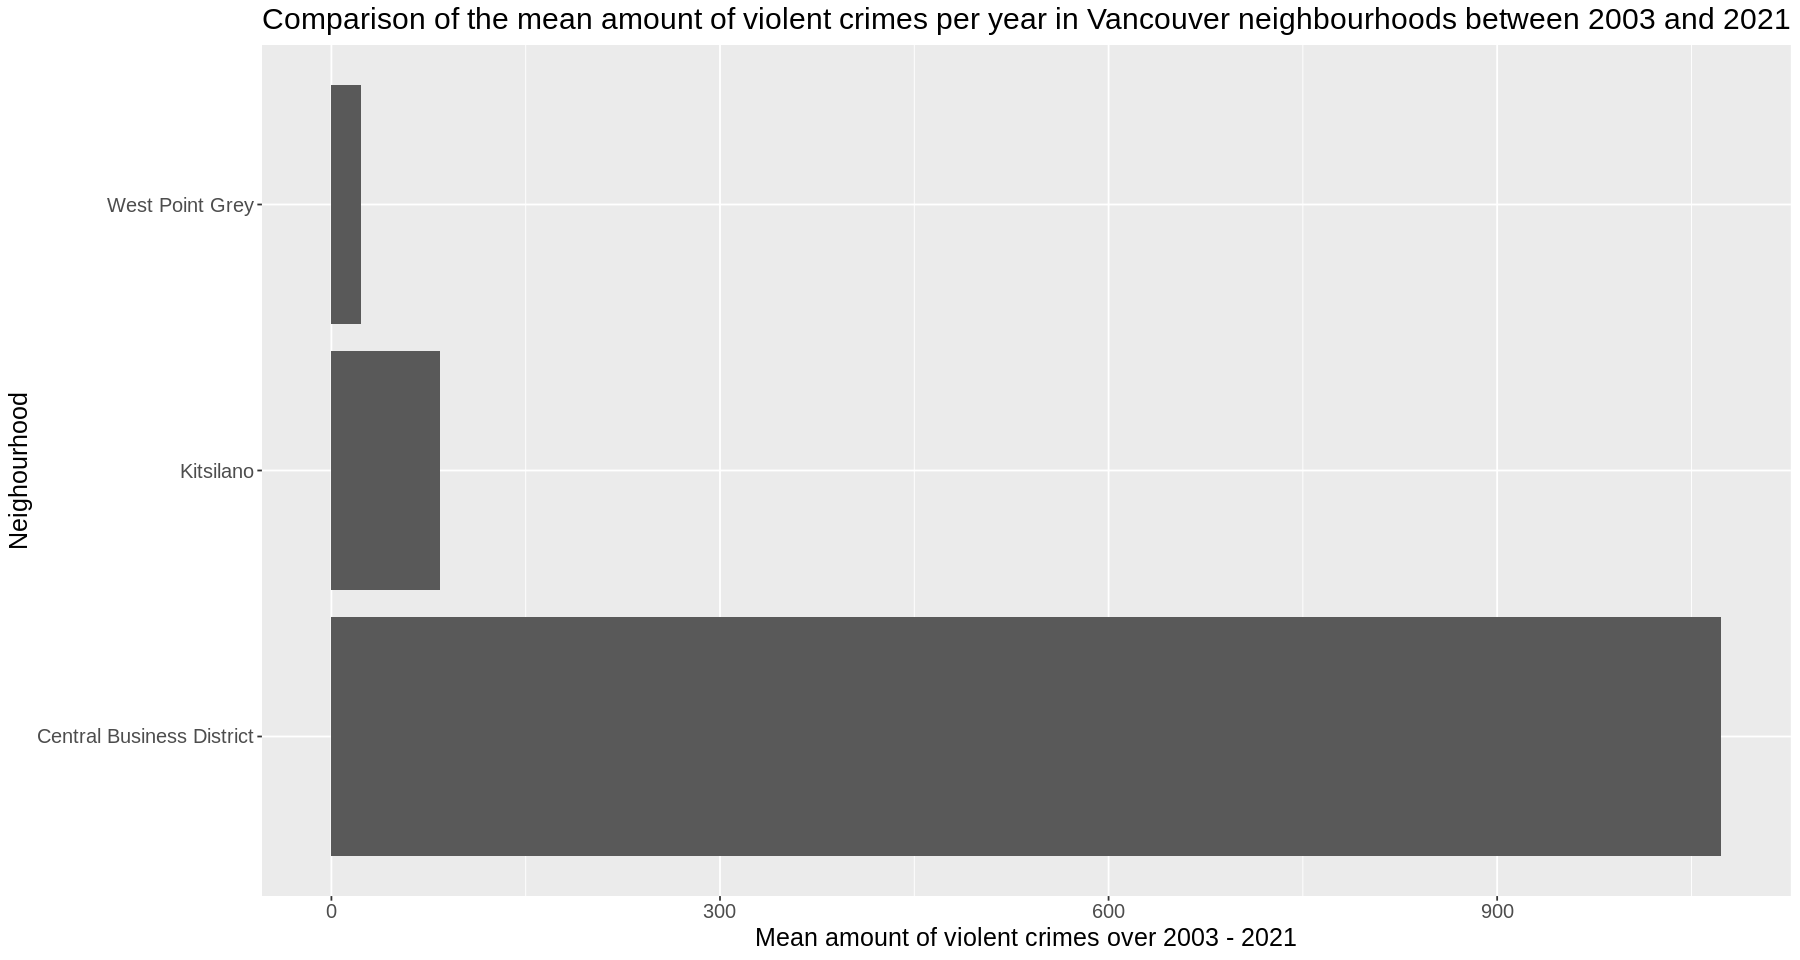

In [18]:
options(repr.plot.width = 15, repr.plot.height = 8)
Crime_mean_plot

*Figure 8: Comparison of the mean amount of violent crimes per year in Vancouver neighbourhoods between 2003 and 2021*

Here is the direct numeric approach to mean proportion of violent crimes in these three neighbourhoods in Vancouver.

In [19]:
violent_crime_mean

NEIGHBOURHOOD,Mean
<chr>,<dbl>
Central Business District,1073.10526
Kitsilano,83.89474
West Point Grey,23.21053


*Table 2: Mean amount of violent crimes per year in Point Grey, Kitsilano, and the Central Business District between 2003 and 2021*

## Methods

The current analysis of the data set demonstrates several strengths. To begin, the calculation of the parameters were done using a reproducible data science workflow, promoting the trustworthiness of the results of our analysis.

This dataset does not represent the entire population of crimes in Vancouver, as not all crimes committed are reported to police authorities. However, the dataset was collected in an unbiased manner, promoting further trust in our results. 

Since the dataset represents a sample of all crimes committed in Vancouver, we cannot confidently say that our results truly reflect the population. There may be some error in our analysis since we only examined a subset of the population, and therefore, we need to quantify the error that was introduced into the calculated parameters. 

To quantify the error that may be present within our analysis, we will calculate the following:

- 90% confidence interval of each parameter
- Hypothesis test that the further a community is from the Central Business District, the lower their mean yearly amount of violent crime incidents. West Point Grey is further than Kitsilano from the Central Business District, and from our initial results, has a lower yearly mean of violent crime.

From the preliminary data analysis, we expect to find that the further a neighbourhood is from the Central Business District, the lower the amount of violent crime it has. In identifying neighbourhoods with the greatest proportion of crimes, we can research what are common social determinants in Vancouver neighbourhoods that cause higher incidences of violent crime. The impacts of these findings can aid policy makers and community leaders in crafting interventions to reduce crime in these neighbourhoods, and create safer communities. 


## 90% Confidence Interval of Proportion Median

In [19]:
Point_Grey_bootstrap <- crime_proportions %>%
                        filter(NEIGHBOURHOOD == "West Point Grey") %>%
                        ungroup() %>%
                        select(Violent_Crime_Proportion) %>%
                        rep_sample_n(reps = 1000, size = 19, replace = TRUE)
Kitsilano_bootstrap <- crime_proportions %>%
                       filter(NEIGHBOURHOOD == "Kitsilano") %>%
                       ungroup() %>%
                       select("Violent_Crime_Proportion") %>%
                       rep_sample_n(reps = 1000, size = 19, replace = TRUE)
CBD_bootstrap <- crime_proportions %>%
                 filter(NEIGHBOURHOOD == "Central Business District") %>%
                 ungroup() %>%
                 select("Violent_Crime_Proportion") %>%
                 rep_sample_n(reps = 1000, size = 19, replace = TRUE)

In [20]:
Point_Grey_sample_median <- Point_Grey_bootstrap %>%
                            group_by(replicate) %>%
                            summarize(prop_median = median(Violent_Crime_Proportion))

Point_Grey_upper_quantile <- Point_Grey_sample_median %>% 
                             pull(prop_median) %>% 
                             quantile(0.95)

Point_Grey_lower_quantile <- Point_Grey_sample_median %>% 
                             pull(prop_median) %>% 
                             quantile(0.05)

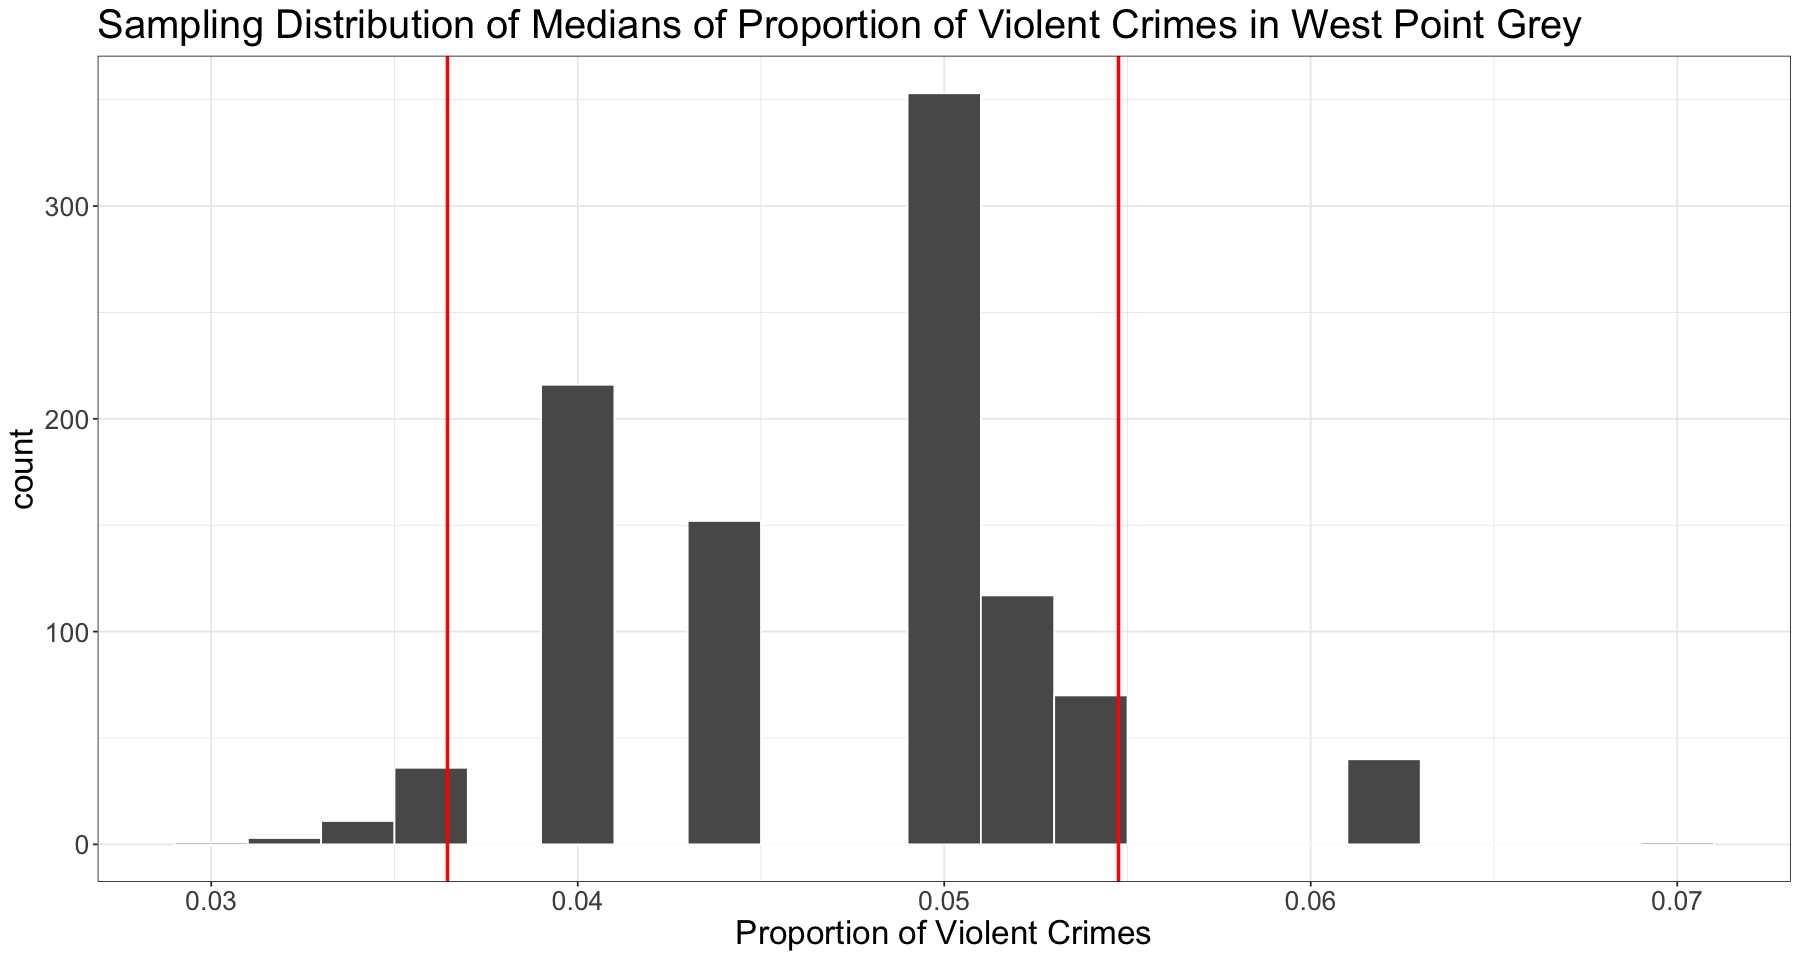

In [21]:
Point_Grey_quantile_plot <- Point_Grey_sample_median %>% 
                            ggplot(aes(x = prop_median)) +
                            theme_bw() +
                            geom_histogram(binwidth = 0.002, color = 'white') +
                            geom_vline(xintercept = Point_Grey_lower_quantile, colour = "red", size = 1) +
                            geom_vline(xintercept = Point_Grey_upper_quantile, colour = "red", size = 1) +
                            labs(title = "Sampling Distribution of Medians of Proportion of Violent Crimes in West Point Grey",
                            x = "Proportion of Violent Crimes") +
                            theme(text = element_text(size = 20))
Point_Grey_quantile_plot

In [22]:
Kitsilano_sample_median <- Kitsilano_bootstrap %>%
                           group_by(replicate) %>%
                           summarize(prop_median = median(Violent_Crime_Proportion))

Kitsilano_upper_quantile <- Kitsilano_sample_median %>% 
                            pull(prop_median) %>% 
                            quantile(0.95)

Kitsilano_lower_quantile <- Kitsilano_sample_median %>% 
                            pull(prop_median) %>% 
                            quantile(0.05)

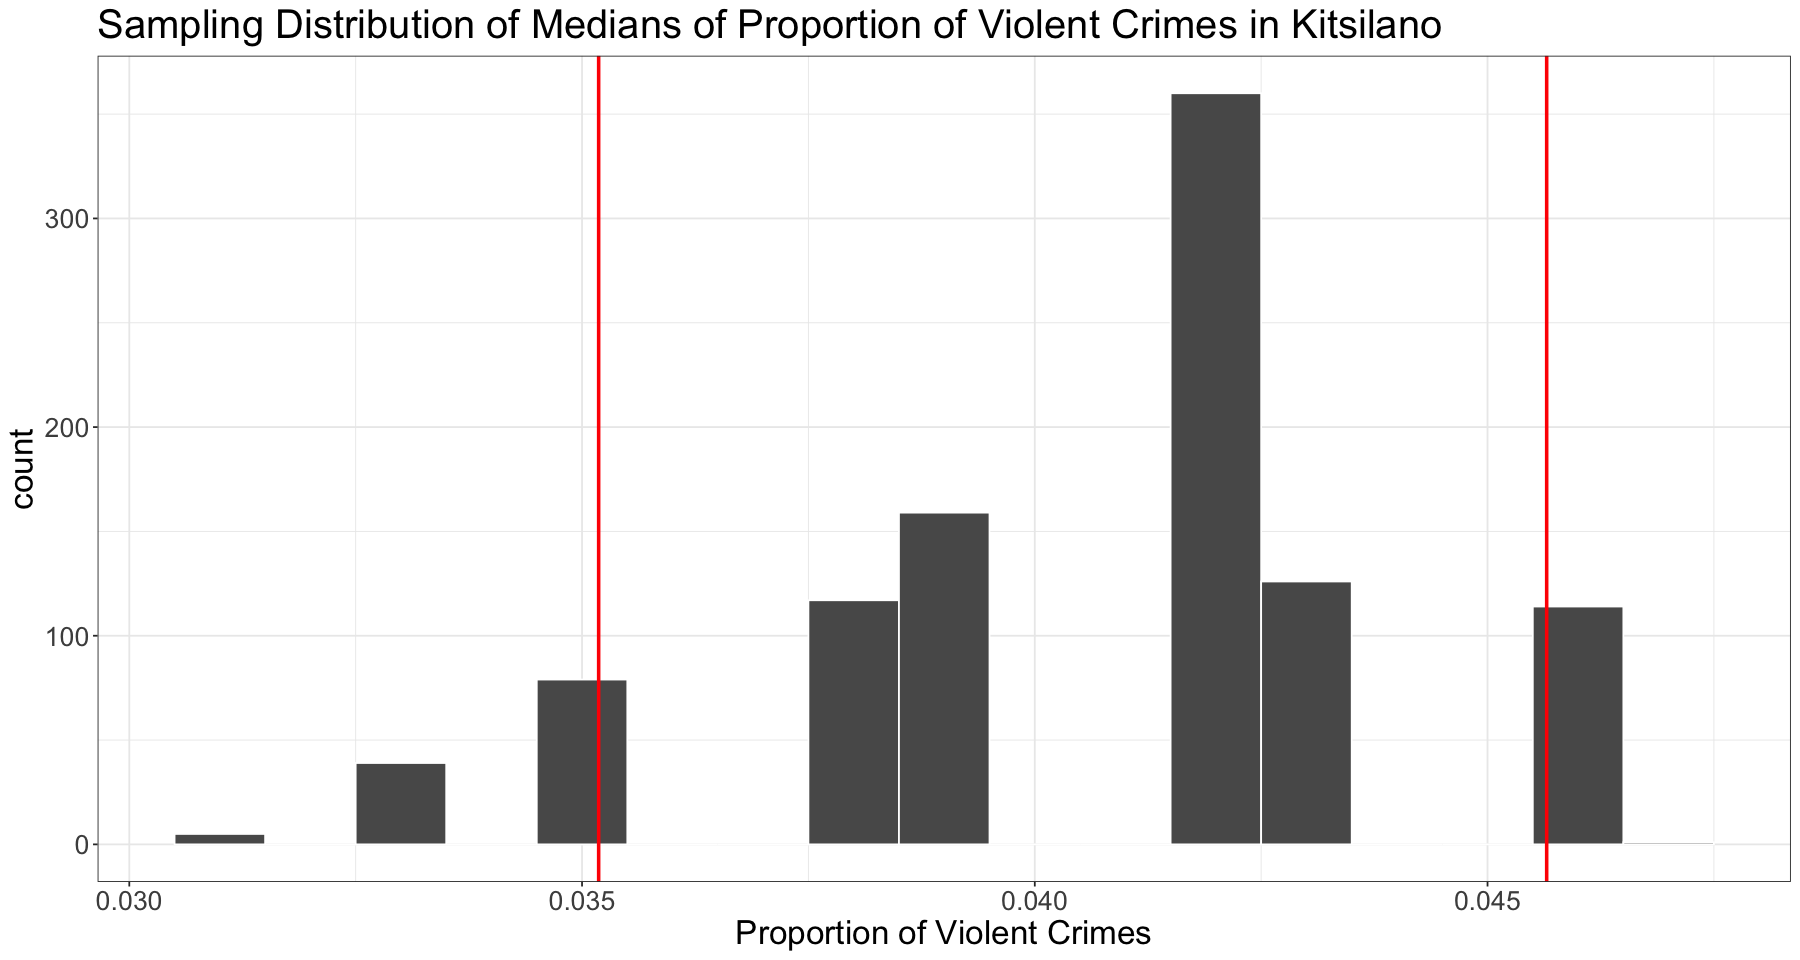

In [23]:
Kitsilano_quantile_plot <- Kitsilano_sample_median %>% 
                           ggplot(aes(x = prop_median)) +
                           theme_bw() +
                           geom_histogram(binwidth = 0.001, color = 'white') +
                           geom_vline(xintercept = Kitsilano_lower_quantile, colour = "red", size = 1) +
                           geom_vline(xintercept = Kitsilano_upper_quantile, colour = "red", size = 1) +
                           labs(title = "Sampling Distribution of Medians of Proportion of Violent Crimes in Kitsilano",
                           x = "Proportion of Violent Crimes") +
                           theme(text = element_text(size = 20))
Kitsilano_quantile_plot

In [24]:
CBD_sample_median <- CBD_bootstrap %>%
                     group_by(replicate) %>%
                     summarize(prop_median = median(Violent_Crime_Proportion))

CBD_upper_quantile <- CBD_sample_median %>% 
                      pull(prop_median) %>% 
                      quantile(0.95)

CBD_lower_quantile <- CBD_sample_median %>% 
                      pull(prop_median) %>% 
                      quantile(0.05)

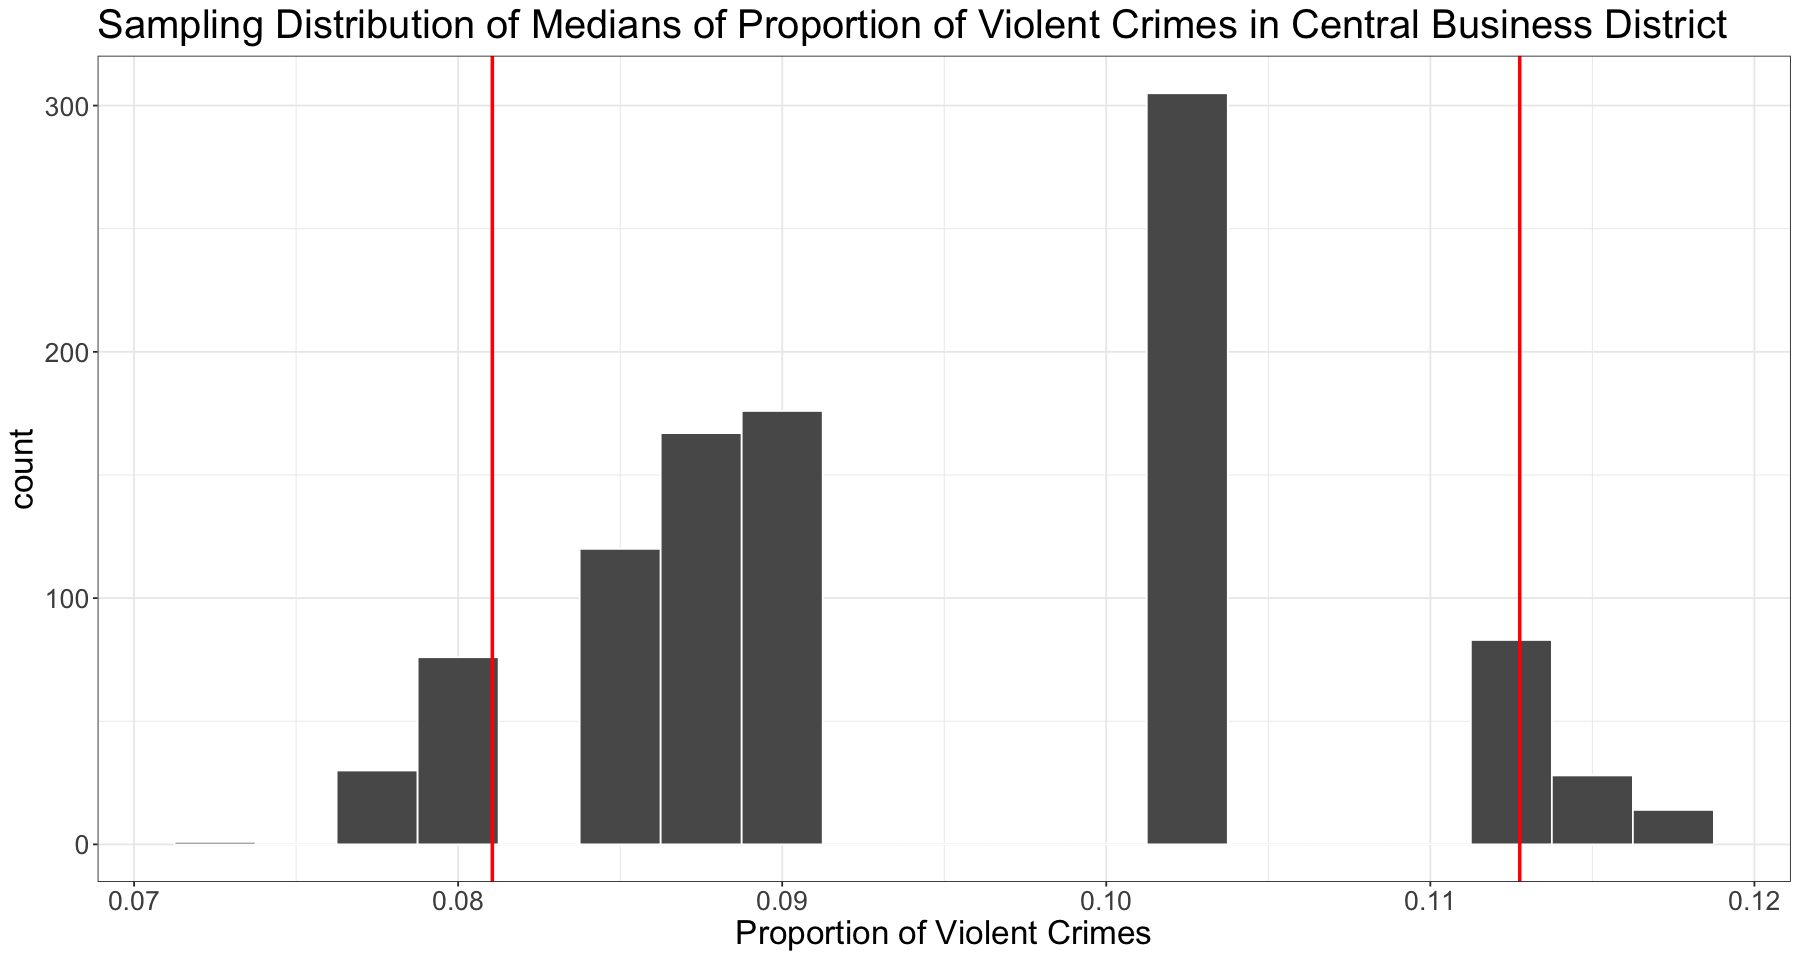

In [25]:
CBD_quantile_plot <- CBD_sample_median %>% 
                     ggplot(aes(x = prop_median)) +
                     theme_bw() +
                     geom_histogram(binwidth = 0.0025, color = 'white') +
                     geom_vline(xintercept = CBD_lower_quantile, colour = "red", size = 1) +
                     geom_vline(xintercept = CBD_upper_quantile, colour = "red", size = 1) +
                     labs(title = "Sampling Distribution of Medians of Proportion of Violent Crimes in Central Business District",
                     x = "Proportion of Violent Crimes") +
                     theme(text = element_text(size = 20))
CBD_quantile_plot

## 90% Confidence Interval of Mean

In [26]:
# total_crime <- violent_crime_years %>% 
#                group_by(NEIGHBOURHOOD) %>% 
#                summarize(sum = n())
# total_crime

In [27]:
Point_Grey_mean_bootstrap <- violent_crime_sum %>%
                             filter(NEIGHBOURHOOD == "West Point Grey") %>%
                             ungroup() %>%
                             select(Violent_Crime_Incidents) %>%
                             rep_sample_n(size = 19, reps = 100, replace = TRUE)
Kitsilano_mean_bootstrap <-  violent_crime_sum %>%
                             filter(NEIGHBOURHOOD == "Kitsilano") %>%
                             ungroup() %>%
                             select(Violent_Crime_Incidents) %>%
                             rep_sample_n(size = 19, reps = 100, replace = TRUE)
CBD_mean_bootstrap <- violent_crime_sum %>%
                      filter(NEIGHBOURHOOD == "Central Business District") %>%
                      ungroup() %>%
                      select(Violent_Crime_Incidents) %>%
                      rep_sample_n(size = 19, reps = 100, replace = TRUE)

In [28]:
Point_Grey_sample_mean <- Point_Grey_mean_bootstrap %>%
                          group_by(replicate) %>%
                          summarize(mean = mean(Violent_Crime_Incidents))

Point_Grey_upper_mean <- Point_Grey_sample_mean %>% 
                         pull(mean) %>% 
                         quantile(0.95)
Point_Grey_lower_mean <- Point_Grey_sample_mean %>% 
                         pull(mean) %>% 
                         quantile(0.05)

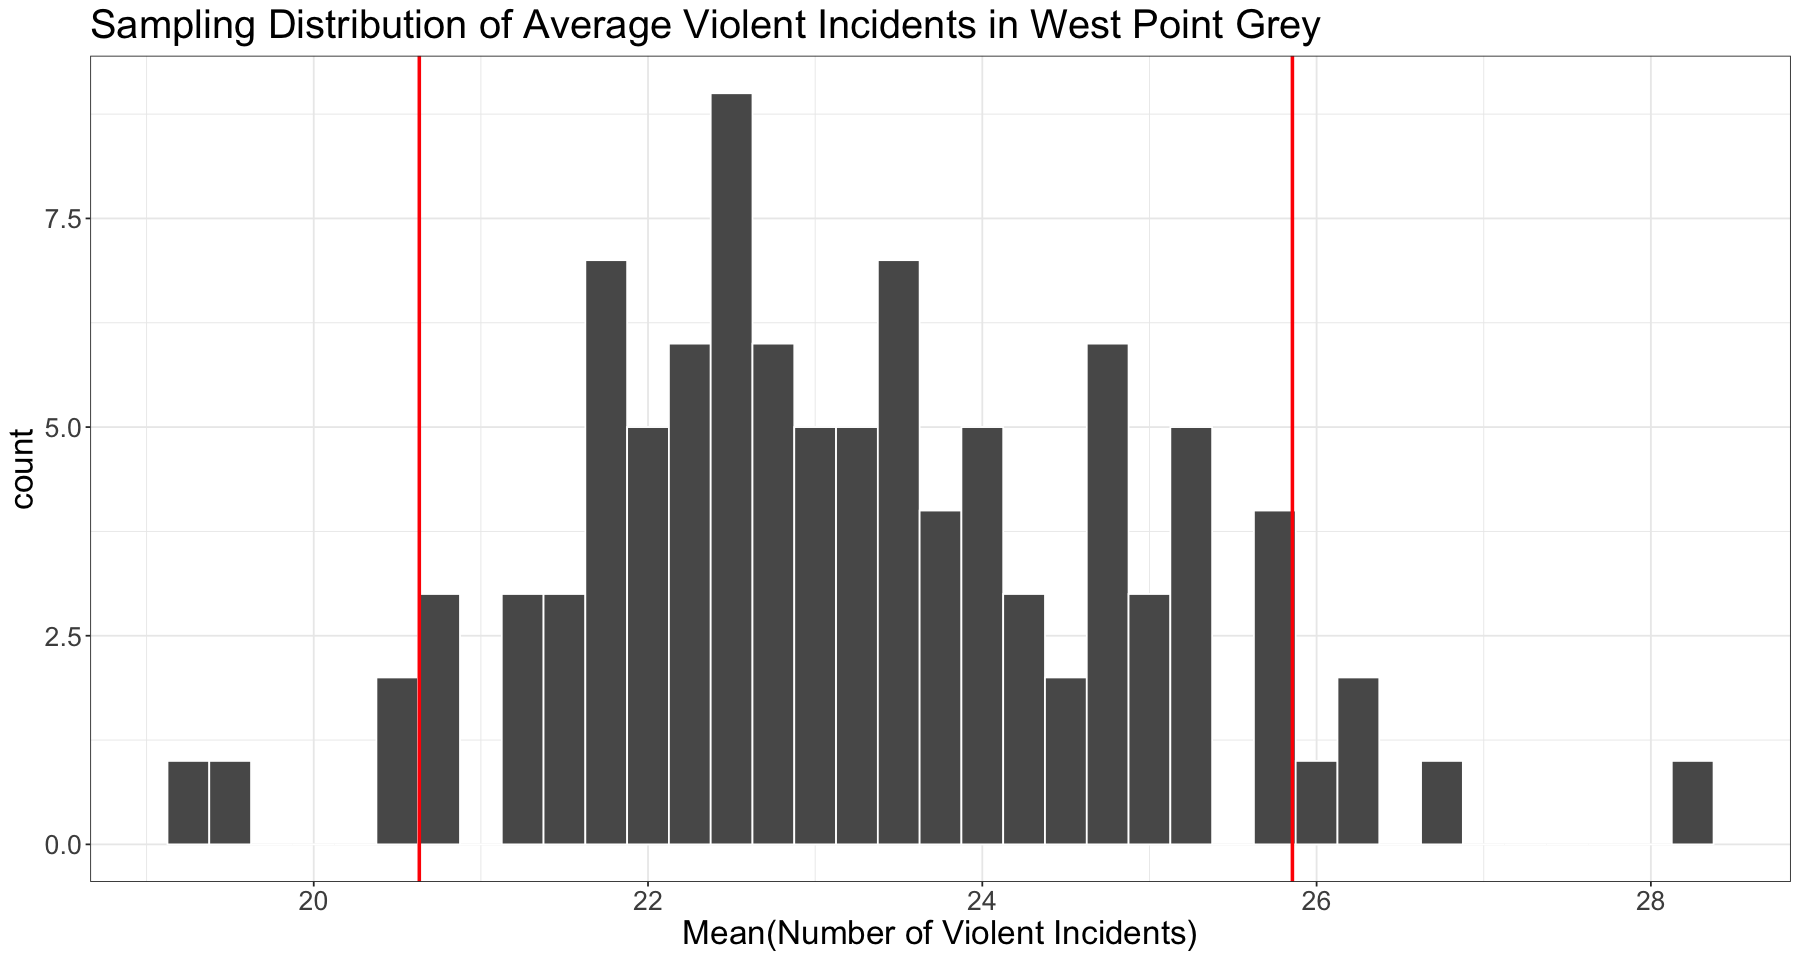

In [29]:
Point_Grey_mean_quantile_plot <- Point_Grey_sample_mean %>% 
                                 ggplot(aes(x = mean)) +
                                 theme_bw() +
                                 geom_histogram(binwidth = 0.25, color = 'white') +
                                 geom_vline(xintercept = Point_Grey_lower_mean, colour = "red", size = 1) +
                                 geom_vline(xintercept = Point_Grey_upper_mean, colour = "red", size = 1) +
                                 labs(title = "Sampling Distribution of Average Violent Incidents in West Point Grey",
                                 x = "Mean(Number of Violent Incidents)") +
                                 theme(text = element_text(size = 20))
Point_Grey_mean_quantile_plot

In [30]:
Kitsilano_sample_mean <- Kitsilano_mean_bootstrap %>%
                         group_by(replicate) %>%
                         summarize(mean = mean(Violent_Crime_Incidents))

Kitsilano_upper_mean <- Kitsilano_sample_mean %>% 
                        pull(mean) %>% 
                        quantile(0.95)
Kitsilano_lower_mean <- Kitsilano_sample_mean %>% 
                        pull(mean) %>% 
                        quantile(0.05)

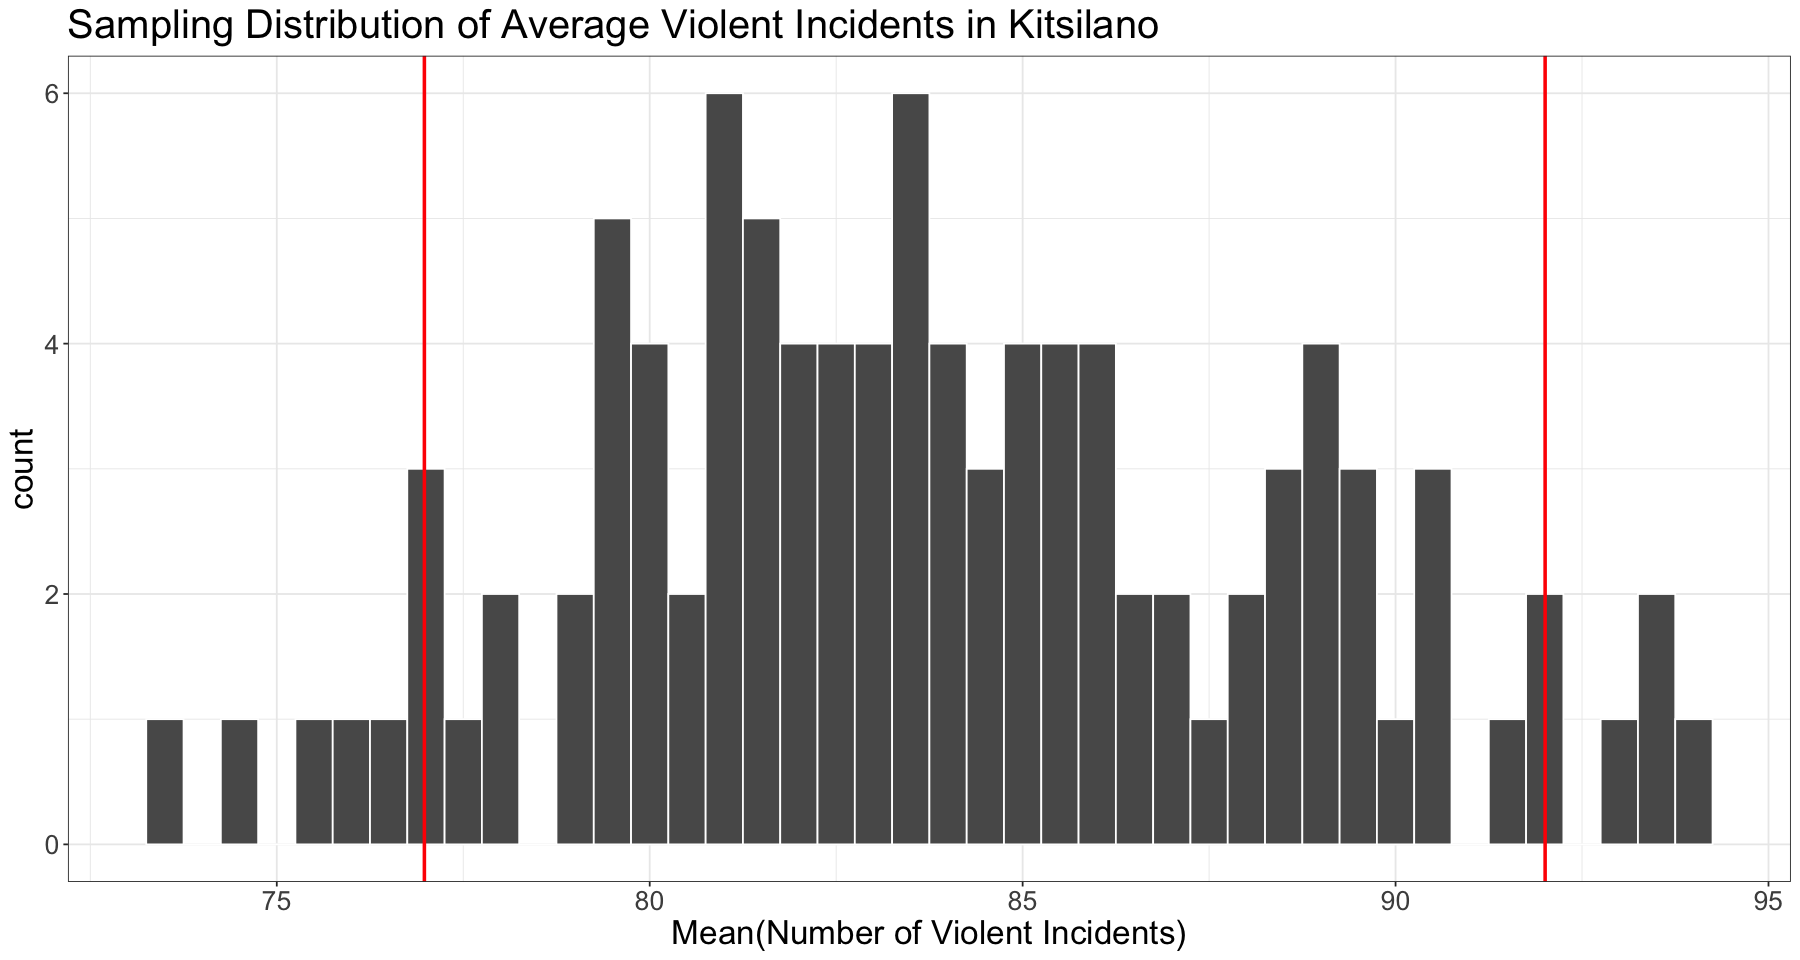

In [31]:
Kitsilano_mean_quantile_plot <- Kitsilano_sample_mean %>% 
                                ggplot(aes(x = mean)) +
                                theme_bw() +
                                geom_histogram(binwidth = 0.5, color = 'white') +
                                geom_vline(xintercept = Kitsilano_lower_mean, colour = "red", size = 1) +
                                geom_vline(xintercept = Kitsilano_upper_mean, colour = "red", size = 1) +
                                labs(title = "Sampling Distribution of Average Violent Incidents in Kitsilano",
                                x = "Mean(Number of Violent Incidents)") +
                                theme(text = element_text(size = 20))
Kitsilano_mean_quantile_plot

In [32]:
CBD_sample_mean <- CBD_mean_bootstrap %>%
                   group_by(replicate) %>%
                   summarize(mean = mean(Violent_Crime_Incidents))

CBD_upper_mean <- CBD_sample_mean %>% 
                  pull(mean) %>% 
                  quantile(0.95)
CBD_lower_mean <- CBD_sample_mean %>% 
                  pull(mean) %>% 
                  quantile(0.05)

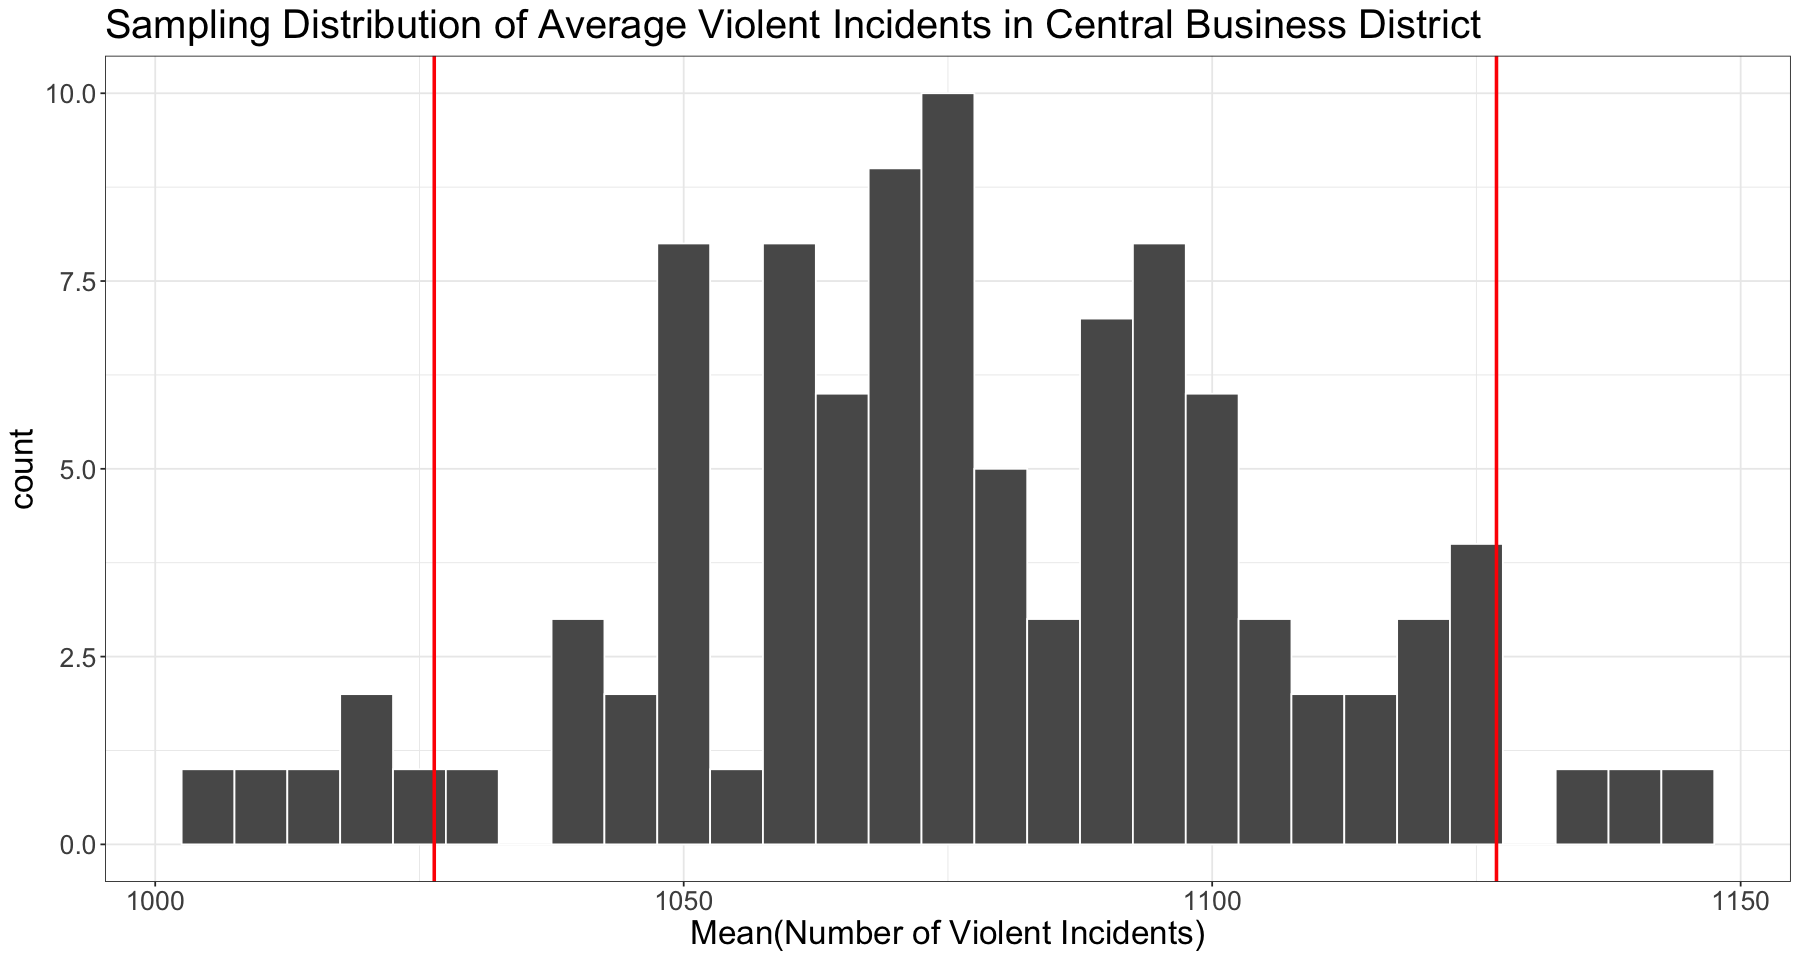

In [33]:
CBD_mean_quantile_plot <- CBD_sample_mean %>% 
                          ggplot(aes(x = mean)) +
                          theme_bw() +
                          geom_histogram(binwidth = 5, color = 'white') +
                          geom_vline(xintercept = CBD_lower_mean, colour = "red", size = 1) +
                          geom_vline(xintercept
                                     = CBD_upper_mean, colour = "red", size = 1) +
                          labs(title = "Sampling Distribution of Average Violent Incidents in Central Business District",
                          x = "Mean(Number of Violent Incidents)") +
                          theme(text = element_text(size = 20))
CBD_mean_quantile_plot

## Asymptotic Methods for Proportion Median

In [58]:
# Use CLM to estimate a 90% CI of proportion median in Point Grey
Point_Grey_CLM <- crime_proportions %>%
                        filter(NEIGHBOURHOOD == "West Point Grey") %>%
                        ungroup()
Point_Grey_median <- median(Point_Grey_CLM$Violent_Crime_Proportion)
Point_Grey_se <- sd(Point_Grey_CLM$Violent_Crime_Proportion)/sqrt(length(Point_Grey_CLM$Violent_Crime_Proportion))
Point_Grey_median_ci <- tibble(
    lower_ci = qnorm(0.05, Point_Grey_median, Point_Grey_se),
    upper_ci = qnorm(0.95, Point_Grey_median, Point_Grey_se)
)
Point_Grey_median_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.04333013,0.05644312


In [59]:
# Use CLM to estimate a 90% CI of proportion median in Kitsilano
Kitsilano_CLM <- crime_proportions %>%
                        filter(NEIGHBOURHOOD == "Kitsilano") %>%
                        ungroup()
Kitsilano_median <- median(Kitsilano_CLM$Violent_Crime_Proportion)
Kitsilano_se <- sd(Kitsilano_CLM$Violent_Crime_Proportion)/sqrt(length(Kitsilano_CLM$Violent_Crime_Proportion))
Kitsilano_median_ci <- tibble(
    lower_ci = qnorm(0.05, Kitsilano_median, Kitsilano_se),
    upper_ci = qnorm(0.95, Kitsilano_median, Kitsilano_se)
)
Kitsilano_median_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.03868935,0.04493844


In [60]:
# Use CLM to estimate a 90% CI of proportion median in CBD
CBD_CLM <- crime_proportions %>%
                        filter(NEIGHBOURHOOD == "Central Business District") %>%
                        ungroup()
CBD_median <- median(CBD_CLM$Violent_Crime_Proportion)
CBD_se <- sd(CBD_CLM$Violent_Crime_Proportion)/sqrt(length(CBD_CLM$Violent_Crime_Proportion))
CBD_median_ci <- tibble(
    lower_ci = qnorm(0.05, CBD_median, CBD_se),
    upper_ci = qnorm(0.95, CBD_median, CBD_se)
)
CBD_median_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.08201791,0.09987761


## Asymptotic Methods for Proportion Average Number of Violent Incidents

In [63]:
# Use CLM to estimate a 90% CI of Mean Violent Incidents Cases in Point Grey
Point_Grey_mean_CLM <- violent_crime_sum %>%
                             filter(NEIGHBOURHOOD == "West Point Grey") %>%
                             ungroup()
Point_Grey_mean <- mean(Point_Grey_mean_CLM$Violent_Crime_Incidents)
Point_Grey_mean_se <- sd(Point_Grey_mean_CLM$Violent_Crime_Incidents)/sqrt(length(Point_Grey_mean_CLM$Violent_Crime_Incidents))
Point_Grey_mean_ci <- tibble(
    lower_ci = qnorm(0.05, Point_Grey_mean, Point_Grey_mean_se),
    upper_ci = qnorm(0.95, Point_Grey_mean, Point_Grey_mean_se)
)
Point_Grey_mean_ci

lower_ci,upper_ci
<dbl>,<dbl>
20.38784,26.03322


In [64]:
# Use CLM to estimate a 90% CI of Mean Violent Incidents Cases in Kitsilano
Kitsilano_mean_CLM <- violent_crime_sum %>%
                             filter(NEIGHBOURHOOD == "Kitsilano") %>%
                             ungroup()
Kitsilano_mean <- mean(Kitsilano_mean_CLM$Violent_Crime_Incidents)
Kitsilano_mean_se <- sd(Kitsilano_mean_CLM$Violent_Crime_Incidents)/sqrt(length(Kitsilano_mean_CLM$Violent_Crime_Incidents))
Kitsilano_mean_ci <- tibble(
    lower_ci = qnorm(0.05, Kitsilano_mean, Kitsilano_mean_se),
    upper_ci = qnorm(0.95, Kitsilano_mean, Kitsilano_mean_se)
)
Kitsilano_mean_ci

lower_ci,upper_ci
<dbl>,<dbl>
75.713,92.07647


In [65]:
# Use CLM to estimate a 90% CI of Mean Violent Incidents Cases in CBD
CBD_mean_CLM <- violent_crime_sum %>%
                             filter(NEIGHBOURHOOD == "Central Business District") %>%
                             ungroup()
CBD_mean <- mean(CBD_mean_CLM$Violent_Crime_Incidents)
CBD_mean_se <- sd(CBD_mean_CLM$Violent_Crime_Incidents)/sqrt(length(CBD_mean_CLM$Violent_Crime_Incidents))
CBD_mean_ci <- tibble(
    lower_ci = qnorm(0.05, CBD_mean, CBD_mean_se),
    upper_ci = qnorm(0.95, CBD_mean, CBD_mean_se)
)
CBD_mean_ci

lower_ci,upper_ci
<dbl>,<dbl>
1018.332,1127.878


## Hypothesis Testing

We now test the hypothesis suggested by the literature, that neighbourhoods that the further a neighbourhood is from the central business district, the lower amount of violent crime it experiences. Since West Point Grey is further than Kitsilano to the Central Business District, we would hypothesize that West Point Grey has lower occurrences of violent crime. 

To compute the hypothesis test, we will test the null hypothesis that the mean yearly occurrence of violent crime experienced by Kitsilano and West Point Grey are equal. Our alternative hypothesis is that Kitsilano has a higher yearly mean of violent crimes. 

First, the observed difference in the mean of violent crimes between Kitsilano and West Point Grey in our data set is calculated.

In [31]:
Kits_WPG_violent_crime <- violent_crime_sum  %>% 
    filter(NEIGHBOURHOOD != "Central Business District")

obs_diff_in_means <- 
    Kits_WPG_violent_crime  %>% 
    specify(formula = Violent_Crime_Incidents ~ NEIGHBOURHOOD) %>%
    calculate(stat = "diff in means", order = c("Kitsilano", "West Point Grey"))
obs_diff_in_means
   

stat
<dbl>
60.68421


Next, we generate the null distribution using simulation via bootstrapping. We choose to generate the null hypothesis via bootstrapping because we have a small, not-normally distributed sample; thus, we cannot assume that the Central Limit Theorem will work.

In [27]:
null_diff_in_means <- 
    Kits_WPG_violent_crime %>% 
    specify(formula = Violent_Crime_Incidents ~ NEIGHBOURHOOD) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute")  %>%
    calculate(stat = "diff in means", order = c("Kitsilano", "West Point Grey"))

We then visualize the null distribution, and annotate on the figure the sample difference of means. It can be observed from the figure that the sample statistic is far to the right of the null distribution.

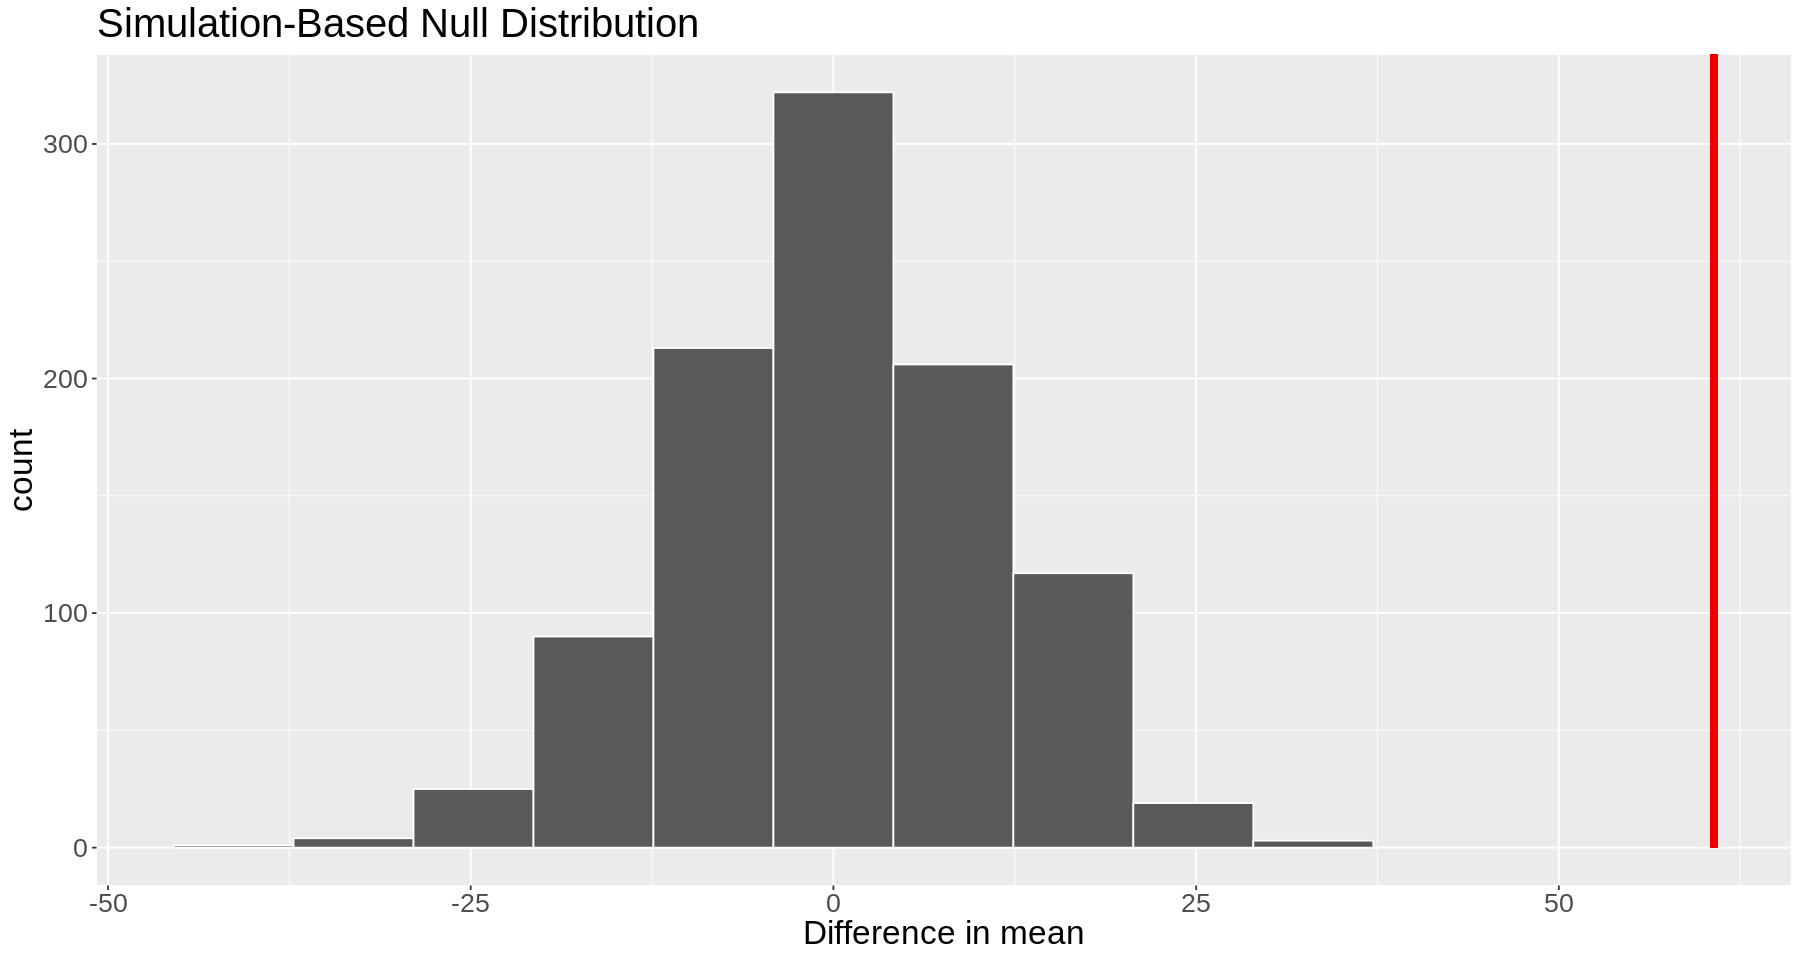

In [29]:
diff_in_means_plot <-
    visualize(null_diff_in_means, bins = 10) + 
    shade_p_value(obs_stat = obs_diff_in_means, direction = "right") +
    xlab("Difference in mean") +
    theme(text = element_text(size = 20))

diff_in_means_plot

The p-value is finally calculated.

In [30]:
p_val <-
    null_diff_in_means %>% 
    get_p_value(obs_stat =  obs_diff_in_means, direction = "right")

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


## Conclusion

Discussion

## References

Andresen, M. (2006). A spatial analysis of crime in Vancouver, British Columbia: A synthesis of social disorganization and routine activity theory. The Canadian Geographer / Le Géographe Canadien, 50(4), 487–502. https://doi.org/10.1111/j.1541-0064.2006.00159.x 

Vancouver Police Department. (2022). Vancouver crime data [Data file]. Retrieved from https://geodash.vpd.ca/opendata/#

Walker, B. B., Schuurman, N., &amp; Hameed, S. M. (2014). A GIS-based spatiotemporal analysis of violent trauma hotspots in Vancouver, Canada: Identification, contextualisation and intervention. BMJ Open, 4(2). https://doi.org/10.1136/bmjopen-2013-003642 